<a href="https://colab.research.google.com/github/casperbh96/COVID-19-Detection/blob/master/Deep_Learning_for_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing, Cloning & Importing

In [34]:
!pip install --upgrade tensorflow-gpu

Requirement already up-to-date: tensorflow-gpu in /usr/local/lib/python3.6/dist-packages (2.1.0)


In [35]:
# Update dataset: !git pull
!git clone https://github.com/casperbh96/COVID-19-Detection.git dataset

fatal: destination path 'dataset' already exists and is not an empty directory.


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2, time
import tensorflow as tf

# Loading The Datasets

In [37]:
covid_path = 'dataset/covid_dataset.csv'
covid_image_path = 'dataset/covid_adjusted/'

normal_path = 'dataset/normal_xray_dataset.csv'
normal_image_path = 'dataset/normal_dataset/'

covid_df = pd.read_csv(covid_path, usecols=['filename', 'finding'])
normal_df = pd.read_csv(normal_path, usecols=['filename', 'finding'])

covid_df.head()

,filename,finding
0,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,COVID-19
1,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,COVID-19
2,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,COVID-19
3,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,COVID-19
4,nejmc2001573_f1a.jpeg.jpg,COVID-19


In [0]:
covid_images = []
covid_labels = []

for index, row in covid_df.iterrows():
    filename = row['filename']
    label = row['finding']
    path = covid_image_path + filename

    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    covid_images.append(image)
    covid_labels.append(label)

normal_images = []
normal_labels = []

for index, row in normal_df.iterrows():
    filename = row['filename']
    label = row['finding']
    path = normal_image_path + filename

    # temporary fix while we preprocess ALL the images
    if filename == '4c268764-b5e5-4417-85a3-da52916984d8.jpg':
        break

    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    normal_images.append(image)
    normal_labels.append(label)

# normalize to interval of [0,1]
covid_images = np.array(covid_images) / 255

# normalize to interval of [0,1]
normal_images = np.array(normal_images) / 255

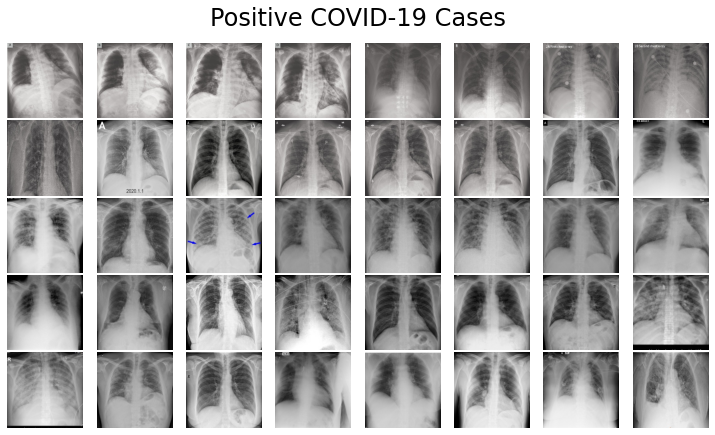

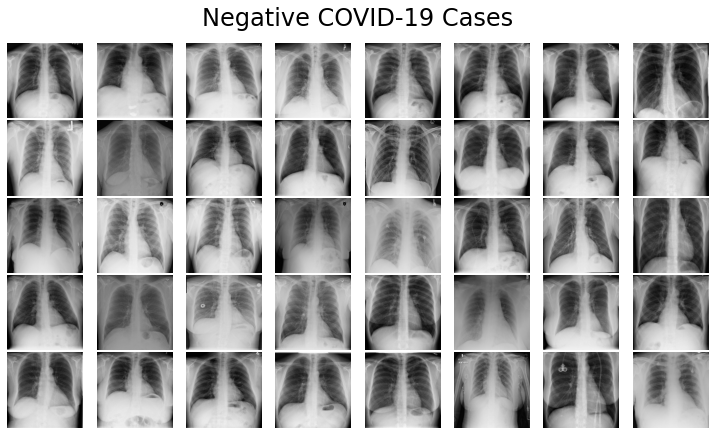

In [6]:
def plot_images(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()

plot_images(covid_images, 'Positive COVID-19 Cases')
plot_images(normal_images, 'Negative COVID-19 Cases')

# Splitting Datasets Into Training and Testing

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

# split into training and testing
covid_x_train, covid_x_test, covid_y_train, covid_y_test = train_test_split(
    covid_images, covid_labels, test_size=0.2)

normal_x_train, normal_x_test, normal_y_train, normal_y_test = train_test_split(
    normal_images, normal_labels, test_size=0.2)

X_train = np.concatenate((covid_x_train, normal_x_train), axis=0)
X_test = np.concatenate((covid_x_test, normal_x_test), axis=0)
y_train = np.concatenate((covid_y_train, normal_y_train), axis=0)
y_test = np.concatenate((covid_y_test, normal_y_test), axis=0)

# make labels into categories - either 0 or 1
y_train = LabelBinarizer().fit_transform(y_train)
y_train = to_categorical(y_train)

y_test = LabelBinarizer().fit_transform(y_test)
y_test = to_categorical(y_test)

# Demonstration of Augmentation

## Contrast

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

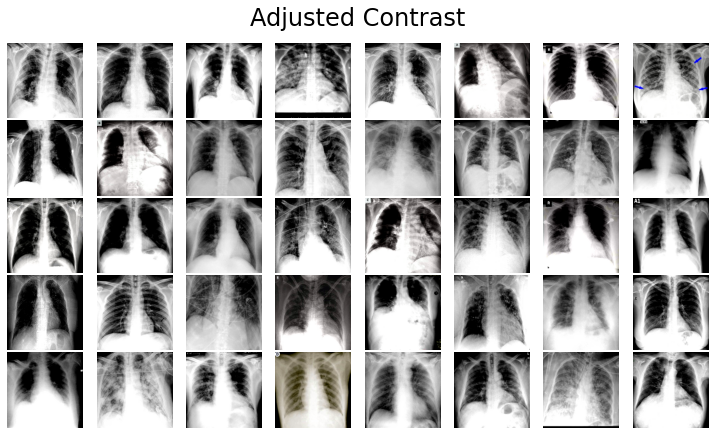

In [0]:
X_train_contrast = []

for x in X_train:
    contrast = tf.image.adjust_contrast( x, 2 )
    X_train_contrast.append(contrast.numpy())

plot_images(X_train_contrast, 'Adjusted Contrast')

## Saturation

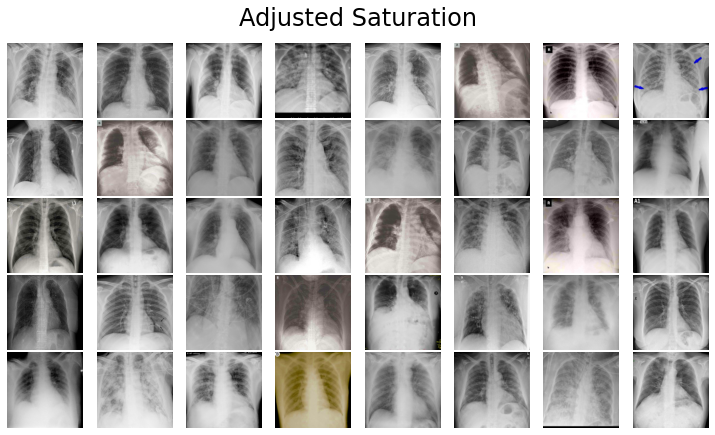

In [0]:
X_train_saturation = []

for x in X_train:
    saturation = tf.image.adjust_saturation( x, 3 )
    X_train_saturation.append(saturation.numpy())

plot_images(X_train_saturation, 'Adjusted Saturation')

## Flip Left Right

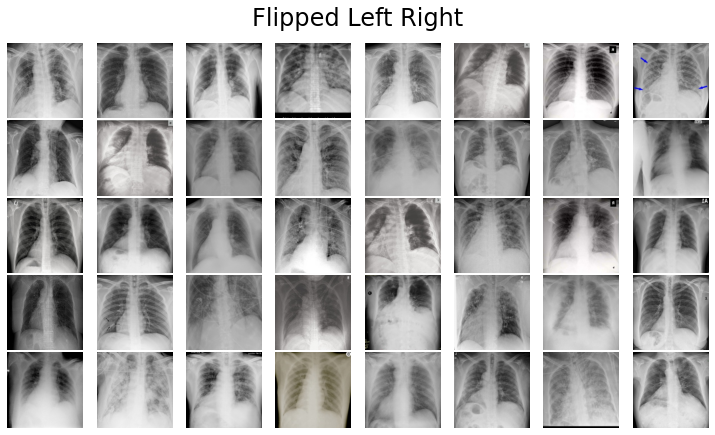

In [0]:
X_train_flipped = []

for x in X_train:
    flipped = tf.image.flip_left_right(x)
    X_train_flipped.append(flipped.numpy())

plot_images(X_train_flipped, 'Flipped Left Right')

## Flip Up Down

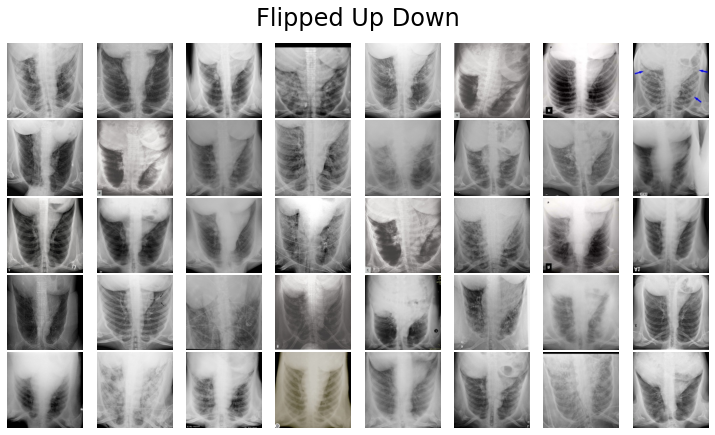

In [0]:
X_train_flipped_up_down = []

for x in X_train:
    flipped = tf.image.flip_up_down(x)
    X_train_flipped_up_down.append(flipped.numpy())

plot_images(X_train_flipped_up_down, 'Flipped Up Down')

## Flip Up Down Left Right

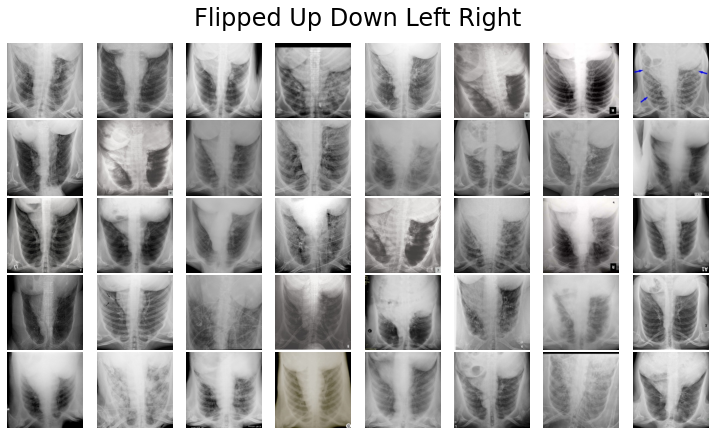

In [0]:
X_train_flipped_up_down_left_right = []

for x in X_train_flipped_up_down:
    flipped = tf.image.flip_left_right(x)
    X_train_flipped_up_down_left_right.append(flipped.numpy())

plot_images(X_train_flipped_up_down_left_right, 'Flipped Up Down Left Right')

## Rotations

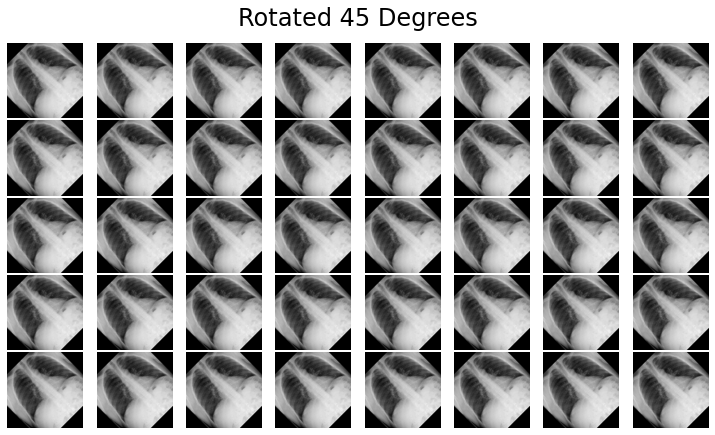

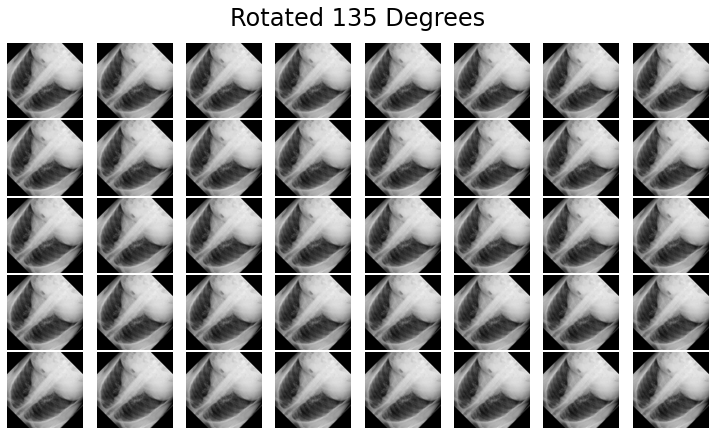

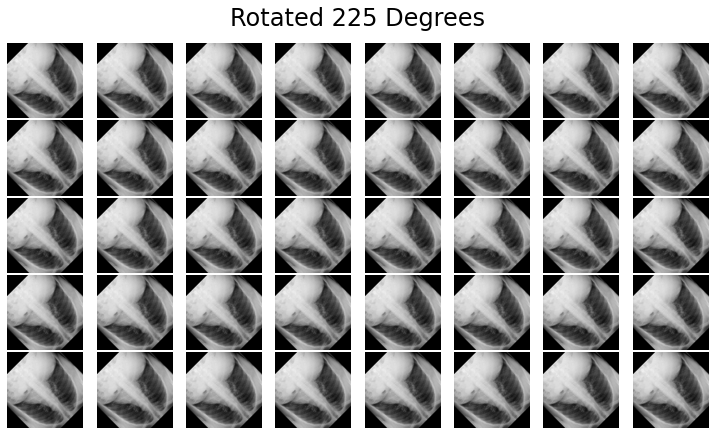

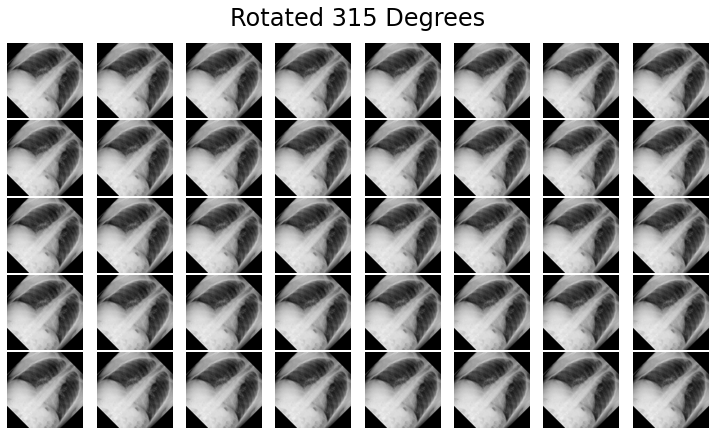

In [0]:
import tensorflow_addons as tfa
from math import radians

X_train_rot_45_deg = []
X_train_rot_135_deg = []
X_train_rot_225_deg = []
X_train_rot_315_deg = []

for x in X_train:
    deg_45 = tfa.image.rotate(image, radians(45))
    deg_135 = tfa.image.rotate(image, radians(135))
    deg_225 = tfa.image.rotate(image, radians(225))
    deg_315 = tfa.image.rotate(image, radians(315))

    X_train_rot_45_deg.append(deg_45)
    X_train_rot_135_deg.append(deg_135)
    X_train_rot_225_deg.append(deg_225)
    X_train_rot_315_deg.append(deg_315)

plot_images(X_train_rot_45_deg, 'Rotated 45 Degrees')
plot_images(X_train_rot_135_deg, 'Rotated 135 Degrees')
plot_images(X_train_rot_225_deg, 'Rotated 225 Degrees')
plot_images(X_train_rot_315_deg, 'Rotated 315 Degrees')

# Modeling With Keras

In [41]:
print(X_train.shape)
print(y_train.shape)

(1305, 224, 224, 3)
(1305, 2)


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

baseModel = VGG19(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)

train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [43]:
history = model.fit(train_aug.flow(X_train, y_train, batch_size=128),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / 128,
                    steps_per_epoch=len(X_train) / 128,
                    epochs=10)

  ...
    to  
  ['...']
Train for 10.1953125 steps, validate on 328 samples
Epoch 1/10
11/10 [================================] - 16s 1s/step - loss: 0.5588 - accuracy: 0.7847 - val_loss: 0.2548 - val_accuracy: 0.9421
Epoch 2/10
11/10 [================================] - 15s 1s/step - loss: 0.3007 - accuracy: 0.9433 - val_loss: 0.3072 - val_accuracy: 0.9421
Epoch 3/10
11/10 [================================] - 15s 1s/step - loss: 0.2862 - accuracy: 0.9441 - val_loss: 0.2646 - val_accuracy: 0.9421
Epoch 4/10
11/10 [================================] - 15s 1s/step - loss: 0.2468 - accuracy: 0.9425 - val_loss: 0.2213 - val_accuracy: 0.9421
Epoch 5/10
11/10 [================================] - 15s 1s/step - loss: 0.2317 - accuracy: 0.9425 - val_loss: 0.2126 - val_accuracy: 0.9421
Epoch 6/10
11/10 [================================] - 15s 1s/step - loss: 0.2373 - accuracy: 0.9410 - val_loss: 0.2128 - val_accuracy: 0.9421
Epoch 7/10
11/10 [================================] - 15s 1s/step - los

In [0]:
y_pred = model.predict(X_test, batch_size=128)
y_pred_covid = model.predict(covid_x_test, batch_size=128)

In [0]:
y_test_covid = LabelBinarizer().fit_transform(covid_y_test)
y_test_covid = to_categorical(y_test_covid)

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.94      1.00      0.97       309

    accuracy                           0.94       328
   macro avg       0.47      0.50      0.49       328
weighted avg       0.89      0.94      0.91       328



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
